In [4]:
import pandas as pd

In [5]:
def get_pivot_data():
    triplets = pd.read_csv('data/triplets_file.csv')
    songs = triplets.groupby('song_id').sum().sort_values('listen_count', ascending=False)
    songs = songs[songs['listen_count'] < 100]

    # delete songs with less than 100 listens
    triplets = triplets[~triplets['song_id'].isin(songs.index)]

    # all listen counts greater than 130 are set to 130
    triplets['listen_count'] = triplets['listen_count'].apply(lambda x: 130 if x > 130 else x)
    
    # use the first 500000 rows
    triplets = triplets.head(500000)
    me = pd.read_csv('data/me.csv')
    triplets = pd.concat([me, triplets], ignore_index=True)
    # get list of songs and total listen count
    songs = triplets.groupby('song_id').sum().sort_values('listen_count', ascending=False)
    return triplets.pivot(index='user_id', columns='song_id', values='listen_count').fillna(0), songs

In [6]:
song_data = pd.read_csv('data/song_data.csv')

In [7]:
pivot, songs_list = get_pivot_data()

/tmp/ipykernel_314942/377261409.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  songs = triplets.groupby('song_id').sum().sort_values('listen_count', ascending=False)
/tmp/ipykernel_314942/377261409.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  songs = triplets.groupby('song_id').sum().sort_values('listen_count', ascending=False)


In [8]:
pivot.shape

(19231, 9919)

In [9]:
# normalize the data using mean
pivot_norm = pivot.subtract(pivot.mean(axis=1), axis=0)


In [10]:
pivot_norm

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZKPR12A6D4F8147,SOZZLTY12A67AE0AD0,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_id,,,,,,,,,,,,,,,,,,,,,
00003a4459f33b92906be11abe0e93efc423c0ff,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,...,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714,-0.001714
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,...,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
000b474f815bcff17a4bc9ce5324f9352dafe07d,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,...,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016,-0.002016
000b4e4134d5f77d7608fbf86fb3e1adac4478a8,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,...,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823,-0.002823
000d2df2cb8ad7300f89512f8fe8fadc4f99e733,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,...,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210,-0.001210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff1d613baa7ce8e5acb7181093d9683804a55b6,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,...,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109,-0.001109
fff300cd094fe04030b79fae550dc9d065190182,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,...,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594,-0.011594
fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,...,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073,-0.009073


In [11]:
# apply PCA to the pivot table
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(pivot_norm)
pca_data = pca.transform(pivot_norm)


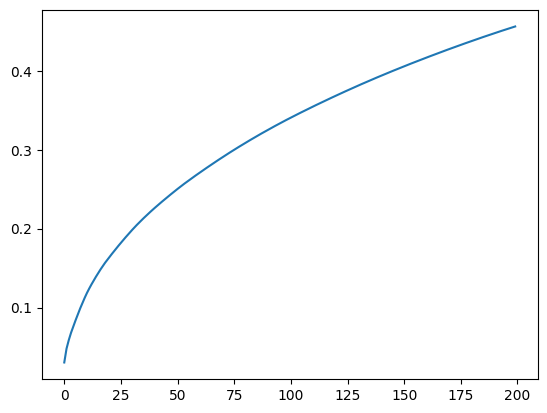

In [12]:
# plot explained variance cumulative sum
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_.cumsum())


In [13]:
print(pca_data.shape)

(19231, 200)


In [14]:
# apply KNN to the PCA data
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=20, algorithm='brute', metric='cosine')
knn.fit(pca_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [15]:
# return list of similar users and distances, sort by closest
def get_similar_users(user_id, n_neighbors=20):
    user_index = pivot.index.get_loc(user_id)
    distances, indices = knn.kneighbors(pca_data[user_index].reshape(1, -1), n_neighbors=n_neighbors)
    return distances, indices

In [16]:
# get similar user for a given user
similar_users = get_similar_users('3b5c884ddaae90cff717ea889ac21eaa460e5720')
similar_users

(array([[0.        , 0.03626054, 0.04895197, 0.06276472, 0.08045298,
         0.08361186, 0.10279929, 0.10409714, 0.11132788, 0.12098436,
         0.12548197, 0.1355327 , 0.14102948, 0.14231402, 0.14231825,
         0.14640079, 0.15191645, 0.15203238, 0.16007353, 0.16385186]]),
 array([[ 4448,  8863, 17338, 14336,  1326,  2158,  9391,   337,  2746,
          3876, 13077, 10879,  6336,   294, 11838, 10361,  7037, 18795,
         11043, 10256]]))

In [17]:
from Helper import *

In [18]:
# get user history for a given user from pivot table with listen_count, join with song metadata, return as a list
def get_user_history(user_id):
    user_index = pivot.index.get_loc(user_id)
    user_history = pivot.iloc[user_index, :]
    user_history = user_history[user_history > 0]
    user_history = user_history.to_frame()
    user_history = user_history.reset_index()
    user_history = user_history.merge(song_data, on='song_id', how='left')
    user_history.columns = ['song_id', 'listen_count', 'title', 'release', 'artist_name', 'year']
    # return as a list
    return user_history.song_id.tolist()
    
my_history = get_user_history('1234_thisisme')
my_history
    

['SOCVTLJ12A6310F0FD',
 'SOETKSY12A8C13C666',
 'SOFPZCI12A58A7CF79',
 'SOGQJKF12A8C13729E',
 'SOICNON12A8C140437',
 'SOKLRPJ12A8C13C3FE',
 'SOMRYYN12A6310F0F3',
 'SONYKOW12AB01849C9',
 'SOPXFGP12A8C13FA9F',
 'SOUKJBT12A6701C4D6',
 'SOWBHRF12A8C137AB2',
 'SOWEJXA12A6701C574']

In [19]:
# user-based collaborative filtering
# use knn distances and indices to get similar users, then get their song history
# user knn distances as weights
def get_user_recommendations(user_id, n_neighbors=10, n_recommendations=10):
    distances, indices = get_similar_users(user_id, n_neighbors)
    similar_users = pivot.iloc[indices[0], :]
    # use knn distances as weights
    weights = 1 - distances.flatten()
    # apply weights to similar users
    weighted_similar_users = similar_users.multiply(weights, axis='index')
    # get sum of weights for each song
    song_ranks = weighted_similar_users.sum().div(weights.sum())
    # sort by listen count
    song_ranks = song_ranks.sort_values(ascending=False)
    # get song history for user
    user_history = get_user_history(user_id)
    # remove songs already listened to
    song_ranks = song_ranks[~song_ranks.index.isin(user_history)]
    # join with song metadata
    song_ranks = song_ranks.to_frame()
    song_ranks = song_ranks.reset_index()
    song_ranks = song_ranks.merge(song_data, on='song_id', how='left')
    song_ranks.columns = ['song_id', 'listen_count', 'title', 'release', 'artist_name', 'year']
    return song_ranks.head(n_recommendations)


In [31]:
# get song recommendations for a given user, join with song metadata
# remove songs that the user has already listened to

res = get_user_recommendations('bead81fc7cd17605d347de6b8cdcb7e2447b9357', 20, 10)

In [32]:
res

,song_id,listen_count,title,release,artist_name,year
0,SOKLRPJ12A8C13C3FE,5.641801,The Scientist,The Scientist,Coldplay,2002
1,SOPXKYD12A6D4FA876,2.193227,Yellow,Yellow,Coldplay,2000
2,SOPXKYD12A6D4FA876,2.193227,Yellow,Deejay 25,Coldplay,2000
3,SOMRYYN12A6310F0F3,1.652339,In My Place,A Rush Of Blood To The Head,Coldplay,2001
4,SOCVTLJ12A6310F0FD,1.519482,Clocks,A Rush Of Blood To The Head,Coldplay,2002
5,SODHXDO12A8C13A37A,1.145174,Falling Slowly (Album version),The Swell Season,Glen Hansard & Marketa Irglova,0
6,SOWEJXA12A6701C574,1.127339,Fix You,X & Y,Coldplay,2005
7,SOLUHDM12A6701BEDA,0.965697,It's So Easy,Appetite For Destruction,Guns N' Roses,1987
8,SOSVPIE12A6D4FA873,0.880032,Shiver,Parachutes,Coldplay,2000
9,SOICLDN12A6D4FD77B,0.829805,Guitarra y vos,Eco,Jorge Drexler,2005


In [29]:
# get user history for a given user, join with song metadata and listen count
def get_user_history(user_id):
    return pivot.loc[user_id][pivot.loc[user_id] > 0].to_frame().merge(song_data, on='song_id', how='left')

In [30]:
# get user history for a given user, join with song metadata, return as a list
history = get_user_history('127d814705f0e56b73955b8e1f6161182af253a4').song_id.tolist()
history

['SOFCVTY12AF72A493B',
 'SOKLRPJ12A8C13C3FE',
 'SOPXKYD12A6D4FA876',
 'SOPXKYD12A6D4FA876',
 'SOSLZXV12A8C1354C9',
 'SOVQJRY12A81C210C0']